In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import scatterplot
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from functools import reduce
from statistics import mode
import matplotlib.pyplot as plt
import random

In [ ]:
#Importing Datasets
links = pd.read_csv("links.csv")
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

## Exploratory Data Analysis

In [ ]:
#Mergining Movie and Rating Data Frane
movie_rating = pd.merge(movies,ratings,how ='outer', on = 'movieId')
rating_movie = pd.merge(ratings,movies, how ='outer', on = 'movieId')
# Merging Rating and Tags
movie_rating_tag = pd.merge(movie_rating,tags,how ='outer', on=['movieId','userId'])

In [ ]:
#Printing Unique Tags out of Total Tags
print (len(tags.tag.unique()))
print(len(tags))

1589
3683


All dataset insights

In [ ]:
#Printing all insights of all datasets and after Merging
movies.info()
tags.info()
ratings.info()
movie_rating.info()
movie_rating_tag.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null 

Checking NULL VALUES

In [ ]:
# Checking null valus in Movie Rating DataFrame
movie_rating_tag.isna().sum()

movieId            0
title            207
genres           207
userId            18
rating           225
timestamp_x      225
tag            99219
timestamp_y    99219
dtype: int64

In [ ]:
# Checking null valus in Movie DataFrame
print("Null values in Movie")
movies.isna().sum()

Null values in Movie


movieId    0
title      0
genres     0
dtype: int64

In [ ]:
# Checking null valus in Ratings DataFrame
print("Null Values in Ratings")
ratings.isna().sum()

Null Values in Ratings


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
# Checking null valus in Title DataFrame
print("Nuull Values in Title")
tags.isna().sum()

Nuull Values in Title


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [ ]:
# Checking null valus in Movie - Ratings DataFrame
print("Nuull Values in Movie-Ratings")
movie_rating.isna().sum()

Nuull Values in Movie-Ratings


movieId       0
title         0
genres        0
userId       18
rating       18
timestamp    18
dtype: int64

In [ ]:
# Checking null valus in Movie Ratings Tag DataFrame
print("Nuull Values in Movie-Ratings-tag")
movie_rating_tag.isna().sum()

Nuull Values in Movie-Ratings-tag


movieId            0
title            207
genres           207
userId            18
rating           225
timestamp_x      225
tag            99219
timestamp_y    99219
dtype: int64

Ploting Corealtion between different feature

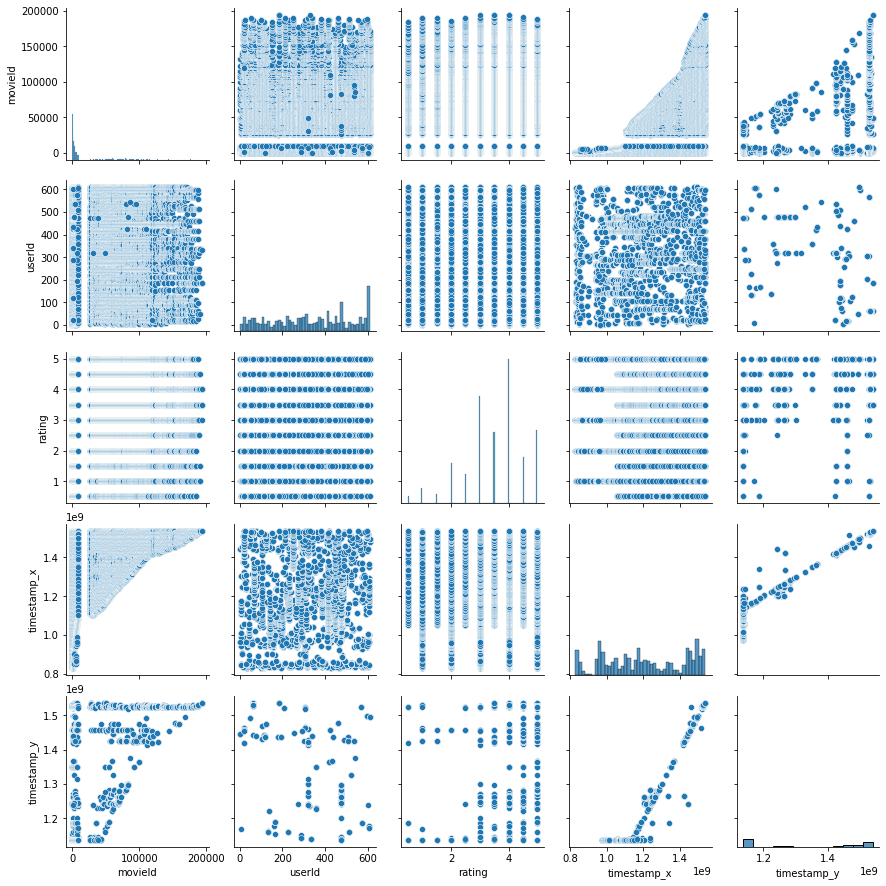

In [ ]:
sns.pairplot(movie_rating_tag )

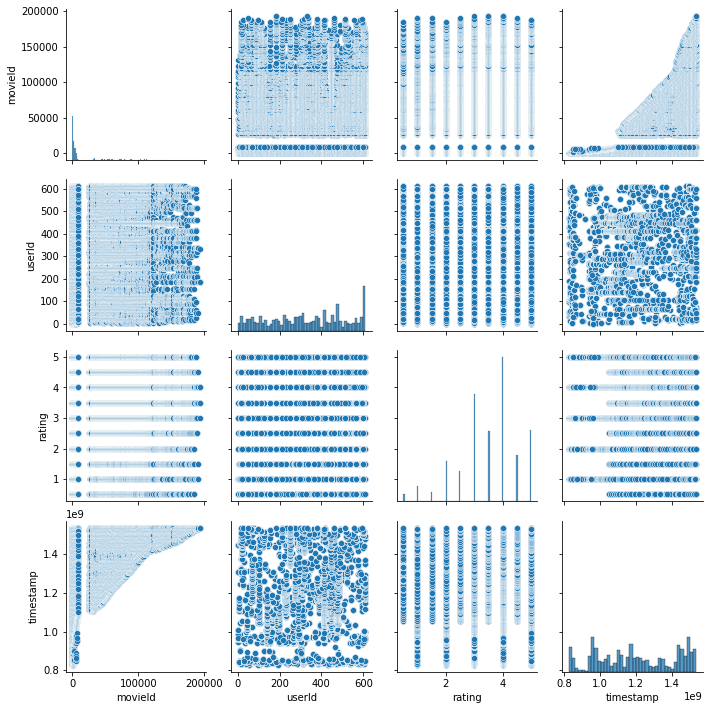

In [ ]:
sns.pairplot(movie_rating)

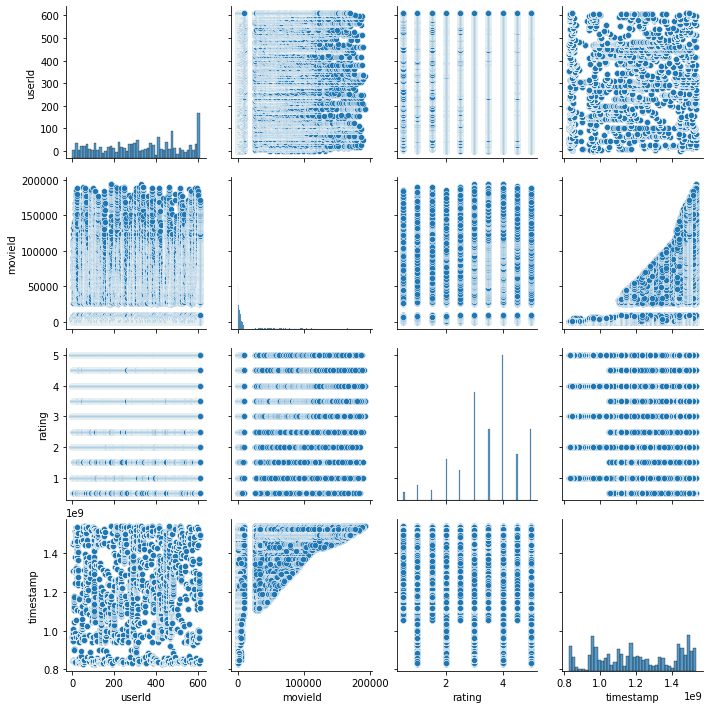

In [ ]:
sns.pairplot(ratings)

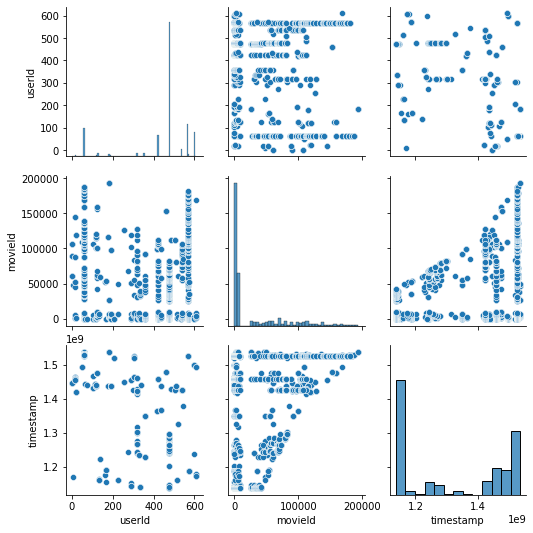

In [ ]:
sns.pairplot(tags)

[Text(0, 0, "'Salem's Lot (2004)"),
 Text(0, 0, '12 Angry Men (1997)'),
 Text(0, 0, '12 Chairs (1976)'),
 Text(0, 0, '20 Million Miles to Earth (1957)'),
 Text(0, 0, '61* (2001)'),
 Text(0, 0, '7 Faces of Dr. Lao (1964)'),
 Text(0, 0, '9/11 (2002)'),
 Text(0, 0, 'A Detective Story (2003)'),
 Text(0, 0, 'A Flintstones Christmas Carol (1994)'),
 Text(0, 0, 'A Perfect Day (2015)'),
 Text(0, 0, 'A Plasticine Crow (1981)'),
 Text(0, 0, 'Act of Killing, The (2012)'),
 Text(0, 0, 'Adventures Of Sherlock Holmes And Dr. Watson: The Twentieth Century Approaches (1986)'),
 Text(0, 0, 'Advise and Consent (1962)'),
 Text(0, 0, 'Alesha Popovich and Tugarin the Dragon (2004)'),
 Text(0, 0, 'Alien Contamination (1980)'),
 Text(0, 0, 'All Yours (2016)'),
 Text(0, 0, 'All the Vermeers in New York (1990)'),
 Text(0, 0, 'American Friend, The (Amerikanische Freund, Der) (1977)'),
 Text(0, 0, 'Animals are Beautiful People (1974)'),
 Text(0, 0, 'Assignment, The (1997)'),
 Text(0, 0, 'Asterix and the Vikings 

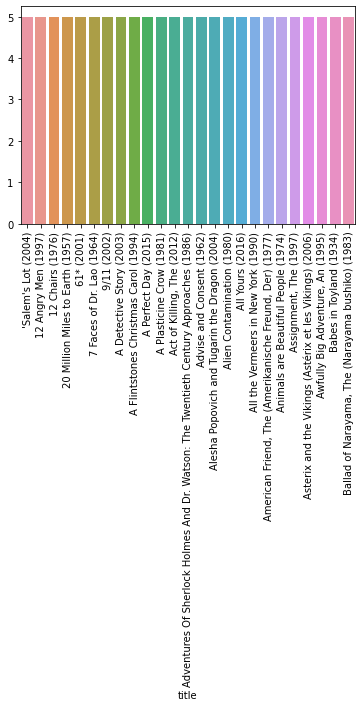

In [ ]:
# Plotting top rated movies with aggregated ratings
mov = movie_rating.groupby('title')['rating'].agg('mean')
plot1=sns.barplot(x=mov.nlargest(25).index,y=mov.nlargest(25).values)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

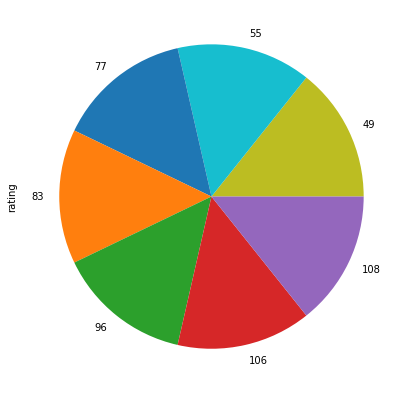

In [ ]:
# Least 25 movies by viewership rating
movie_rating.groupby('movieId')['rating'].count().nsmallest(25).plot(kind = 'pie', figsize = (8,7))

In [ ]:
#Ratings for all the movies for all the customers
df_1 = movie_rating.groupby('rating')['movieId'].count()
df_1

rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: movieId, dtype: int64

## Recommendation System

In [ ]:
#Making groups based on users profile
ratingsGrouped = movie_rating.sort_values('userId').groupby(by='userId')
ratingsGrouped.get_group(2)


,movieId,title,genres,userId,rating,timestamp
91373,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,2.0,4.0,1.445715e+09
90699,74458,Shutter Island (2010),Drama|Mystery|Thriller,2.0,4.0,1.445715e+09
91063,77455,Exit Through the Gift Shop (2010),Comedy|Documentary,2.0,3.0,1.445715e+09
98721,131724,The Jinx: The Life and Deaths of Robert Durst ...,Documentary,2.0,5.0,1.445715e+09
82957,46970,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy,2.0,4.0,1.445715e+09
97256,112552,Whiplash (2014),Drama,2.0,4.0,1.445715e+09
90135,71535,Zombieland (2009),Action|Comedy|Horror,2.0,3.0,1.445715e+09
91793,80489,"Town, The (2010)",Crime|Drama|Thriller,2.0,4.5,1.445715e+09
34763,1704,Good Will Hunting (1997),Drama|Romance,2.0,4.5,1.445715e+09
91890,80906,Inside Job (2010),Documentary,2.0,5.0,1.445715e+09


In [ ]:
#Grouping Movie ratings by userId and sorting it
ratingsGrouped = movie_rating.sort_values('userId').groupby(by='userId')
len_i = len(ratings ['userId'].unique())
print(len_i)

#movie_list will contain set of movies with high ratings for each user 
movie_list=[]
movie_trans=[]
for i in range(1,len_i):
  movie_list=[]
  ratedMovies = ratingsGrouped.get_group(i)
  high = ratedMovies[ratedMovies.rating >= 3]
  movie_list = high.title
  movie_trans.append(movie_list)

print(movie_trans[1])

610
91373                                     Inception (2010)
90699                                Shutter Island (2010)
91063                    Exit Through the Gift Shop (2010)
98721    The Jinx: The Life and Deaths of Robert Durst ...
82957    Talladega Nights: The Ballad of Ricky Bobby (2...
97256                                      Whiplash (2014)
90135                                    Zombieland (2009)
91793                                     Town, The (2010)
34763                             Good Will Hunting (1997)
91890                                    Inside Job (2010)
83525                                 Departed, The (2006)
89054                          Inglourious Basterds (2009)
76960                                    Collateral (2004)
93512                                       Warrior (2011)
86885                              Dark Knight, The (2008)
8652                      Shawshank Redemption, The (1994)
92756                         Louis C.K.: Hilarious 

In [ ]:
#Encoding the list into transaction using transaction encoder
trans_enc = TransactionEncoder()
te_ary = trans_enc.fit(movie_trans).transform(movie_trans)
df =pd.DataFrame(te_ary,columns=trans_enc.columns_)
print(df)

     'Hellboy': The Seeds of Creation (2004)  ...  ¡Three Amigos! (1986)
0                                      False  ...                   True
1                                      False  ...                  False
2                                      False  ...                  False
3                                      False  ...                  False
4                                      False  ...                  False
..                                       ...  ...                    ...
604                                    False  ...                  False
605                                    False  ...                  False
606                                    False  ...                  False
607                                    False  ...                  False
608                                    False  ...                  False

[609 rows x 8275 columns]


In [ ]:
#Using the transaction finding the frequent itemset
from mlxtend.frequent_patterns import apriori 
f_i = apriori(df , min_support = 0.08, use_colnames = True)
f_i

,support,itemsets
0,0.087028,(12 Angry Men (1957))
1,0.152709,(2001: A Space Odyssey (1968))
2,0.087028,(28 Days Later (2002))
3,0.116585,(300 (2007))
4,0.101806,"(40-Year-Old Virgin, The (2005))"
...,...,...
108605,0.080460,(Star Wars: Episode VI - Return of the Jedi (1...
108606,0.082102,"(Memento (2000), Star Wars: Episode VI - Retur..."
108607,0.080460,(Star Wars: Episode VI - Return of the Jedi (1...
108608,0.083744,(Star Wars: Episode VI - Return of the Jedi (1...


In [ ]:
#Using apriori making asscosiation rules
from mlxtend.frequent_patterns import association_rules
res = association_rules(f_i,metric = 'confidence',min_threshold = 0.3)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alien (1979)),(2001: A Space Odyssey (1968)),0.211823,0.152709,0.095238,0.449612,2.944236,0.062891,1.539444
1,(2001: A Space Odyssey (1968)),(Alien (1979)),0.152709,0.211823,0.095238,0.623656,2.944236,0.062891,2.094300
2,(Aliens (1986)),(2001: A Space Odyssey (1968)),0.182266,0.152709,0.090312,0.495495,3.244696,0.062478,1.679451
3,(2001: A Space Odyssey (1968)),(Aliens (1986)),0.152709,0.182266,0.090312,0.591398,3.244696,0.062478,2.001296
4,(2001: A Space Odyssey (1968)),(American Beauty (1999)),0.152709,0.303777,0.091954,0.602151,1.982214,0.045564,1.749967
...,...,...,...,...,...,...,...,...,...
2353939,(Lord of the Rings: The Fellowship of the Ring...,(Star Wars: Episode VI - Return of the Jedi (1...,0.228243,0.088670,0.082102,0.359712,4.056755,0.061864,1.423313
2353940,(Lord of the Rings: The Fellowship of the Ring...,(Star Wars: Episode VI - Return of the Jedi (1...,0.252874,0.091954,0.082102,0.324675,3.530844,0.058849,1.344607
2353941,"(Shawshank Redemption, The (1994), Matrix, The...",(Star Wars: Episode VI - Return of the Jedi (1...,0.270936,0.105090,0.082102,0.303030,2.883523,0.053629,1.284001
2353942,"(Shawshank Redemption, The (1994), Lord of the...",(Star Wars: Episode VI - Return of the Jedi (1...,0.190476,0.105090,0.082102,0.431034,4.101562,0.062085,1.572872


In [ ]:
#Sorting the values of results in descending order
res = res.sort_values(by='lift',ascending=[False])
res['antecedents']

1570335    (Kill Bill: Vol. 1 (2003), Star Wars: Episode ...
1570342    (Kill Bill: Vol. 2 (2004), Matrix, The (1999),...
1873712    (Kill Bill: Vol. 2 (2004), Matrix, The (1999),...
1873701    (Kill Bill: Vol. 1 (2003), Star Wars: Episode ...
2311881    (Fight Club (1999), Star Wars: Episode VI - Re...
                                 ...                        
1970                           (Beauty and the Beast (1991))
1067                                      (Apollo 13 (1995))
3208                             (Dances with Wolves (1990))
4292                                  (Fugitive, The (1993))
1591                                         (Batman (1989))
Name: antecedents, Length: 2353944, dtype: object

In [ ]:
#Genrating List of all genres
def genreList():
  L2=[]
  for i in range(len(movies)):
    try :
      genres = movies['genres'][i].split('|') 
      L2.extend (genres) 
    except : 
      L2.append (movies['genres'][i])
  L2 =  list (set (L2))
  L2.remove('(no genres listed)')
  return L2

In [ ]:
#Storing Top 20 rated movies from each genre
import re
mov_rat = ratings.groupby('movieId').rating.mean()
df_mov = pd.merge(movies , mov_rat, how='outer',on='movieId')
df_mov['rating'].fillna(0,inplace=True)
df_mov_new = df_mov.sort_values('rating',ascending=False)
df_mov_new.to_csv('abc.csv')




In [ ]:
df_mov_new1 =df_mov_new

In [ ]:
#Storing the result in output.csv
df_mov_new1.to_csv('output.csv')

In [ ]:
df_new = pd.read_csv('output.csv')
df_new

,Unnamed: 0,movieId,title,genres,rating
0,7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
1,2838,3795,"Five Senses, The (1999)",Drama,5.0
2,8986,138966,Nasu: Summer in Andalusia (2003),Animation,5.0
3,1006,1310,Hype! (1996),Documentary,5.0
4,8993,139640,Ooops! Noah is Gone... (2015),Animation,5.0
...,...,...,...,...,...
9737,2211,2939,Niagara (1953),Drama|Thriller,0.0
9738,4037,5721,"Chosen, The (1981)",Drama,0.0
9739,5452,26085,Mutiny on the Bounty (1962),Adventure|Drama|Romance,0.0
9740,5421,25855,"Roaring Twenties, The (1939)",Crime|Drama|Thriller,0.0


In [ ]:
#genrating the genre list and sorting in ascending order
gen = genreList()
gen = sorted(gen)

In [ ]:
random.sample([1,3,6,4,5],2)

[6, 1]

In [ ]:
df_new["genres"] = df_new["genres"].apply(lambda x: x.split('|')).astype("unicode")

In [ ]:
df_new.head(40)

,Unnamed: 0,movieId,title,genres,rating
0,7656,88448,Paper Birds (Pájaros de papel) (2010),"['Comedy', 'Drama']",5.0
1,2838,3795,"Five Senses, The (1999)",['Drama'],5.0
2,8986,138966,Nasu: Summer in Andalusia (2003),['Animation'],5.0
3,1006,1310,Hype! (1996),['Documentary'],5.0
4,8993,139640,Ooops! Noah is Gone... (2015),['Animation'],5.0
5,7332,77846,12 Angry Men (1997),"['Crime', 'Drama']",5.0
6,9007,140133,Hollywood Chainsaw Hookers (1988),"['Comedy', 'Horror']",5.0
7,9012,140265,George Carlin: Jammin' in New York (1992),['Comedy'],5.0
8,7301,76091,Mother (Madeo) (2009),"['Crime', 'Drama', 'Mystery', 'Thriller']",5.0
9,4108,5888,Brother (Brat) (1997),"['Crime', 'Drama']",5.0


In [ ]:
#Genrating top 20 rated movies for each genres
li= []
for g in gen:
  count = 0
  data = []
  for index, row in df_new.iterrows():
      if g in row['genres']:
        data.append(row['title'])
        count+=1
      if (count==20):
        li.append(data)
        break
li

[['Love Exposure (Ai No Mukidashi) (2008)',
  'Tokyo Tribe (2014)',
  'Galaxy of Terror (Quest) (1981)',
  'Sisters (Syostry) (2001)',
  'Assignment, The (1997)',
  'Max Manus (2008)',
  'Reform School Girls (1986)',
  'Superman/Batman: Public Enemies (2009)',
  'Crippled Avengers (Can que) (Return of the 5 Deadly Venoms) (1981)',
  'Supercop 2 (Project S) (Chao ji ji hua) (1993)',
  'Wonder Woman (2009)',
  'Justice League: Doom (2012) ',
  'Maniac Cop 2 (1990)',
  'The Big Bus (1976)',
  'Faster (2010)',
  'Shogun Assassin (1980)',
  "On the Other Side of the Tracks (De l'autre côté du périph) (2012)",
  'Branded to Kill (Koroshi no rakuin) (1967)',
  'Sonatine (Sonachine) (1993)',
  'Last Hurrah for Chivalry (Hao xia) (1979)'],
 ['12 Chairs (1976)',
  'Return to Treasure Island (1988)',
  'The Love Bug (1997)',
  'Ice Age: The Great Egg-Scapade (2016)',
  'Dragons: Gift of the Night Fury (2011)',
  'Light Years (Gandahar) (1988)',
  'Monster Squad, The (1987)',
  'Crippled Avengers 

In [ ]:
def flatten(t):
  flat_list = [item for sublist in t for item in sublist]

In [ ]:
dict_mov_idx = {'Action':0,
 'Adventure':1,
 'Animation':2,
 'Children':3,
 'Comedy':4,
 'Crime':5,
 'Documentary':6,
 'Drama':7,
 'Fantasy':8,
 'Film-Noir':9,
 'Horror':10,
 'IMAX':11,
 'Musical':12,
 'Mystery':13,
 'Romance':14,
 'Sci-Fi':15,
 'Thriller':16,
 'War':17,
 'Western':18}

In [ ]:
#Calculating the precision based on the genres
def Precision(L1,rec):
   calc_prec = 0
   genre  = []
   for mov in L1:
      for i in range(len(movies)):
        if(mov == movies['title'][i]):
          genre.append(movies['genres'][i].split('|'))
   g_flat =  reduce(lambda z, y :z + y, genre)
   g_flat = list(set(g_flat))
   print(g_flat)
   for i in range (len(rec)):
      for j in range(len(movies)):
        if(rec[i] == movies['title'][j]):
          # print("Found movie : ", rec[i])
          inter = set(g_flat).intersection(movies['genres'][j].split("|"))
          if inter:
            # print("Found Common genre:",inter)
            calc_prec+=1
  #  print("Precision =",(calc_prec)/4)
   return ((calc_prec)/4)

In [ ]:
#Finding the most common genres
def most_common(lst):
    return max(set(lst), key=lst.count)

In [ ]:
#Recommending movies based on the rules
def movieRec(L1):
  print("In L1")
  movie_recommended = []
  count = 0
  for i in range(1,len(res)):
    if (list(res['antecedents'][i]) == L1):
      x = list(res['consequents'][i])
      if x not in movie_recommended: 
        movie_recommended.append(x)
        count+=1
    if (count ==4):
      break;
  if(count ==4):
    flat_movie = reduce(lambda z, y :z + y, movie_recommended)
    flat_movie = flat_movie[:4]
    print("Movie Recommended" , flat_movie)
    return flat_movie
  else:
    g = []
    for mov in L1:
      for i in range(len(movies)):
        # print("in mov")
        if(mov == movies['title'][i]):
          g.append(movies['genres'][i].split('|'))
    g_flat =  reduce(lambda z, y :z + y, g)
    x = most_common(g_flat)
    index = dict_mov_idx[x]
    mov_rec = random.sample(li[index],4)
    print("Movie Recommended:" ,mov_rec)
    return mov_rec

In [ ]:
 #taking input from the user 
 def User_Input_Movie():
    L1 = []
    no = int(input("Enter number of movies you have watchd : "))
    for i in range(no):
        in_1 = input("Enter Movies you have watched : ")
        L1.append(in_1)
    print("User Input " , L1)
    movieRec(L1)
    print ("Precision =", )
    # L1 = ['Batman (1989)', 'Forrest Gump (1994)']
    # Enter Movies you have watched : Alien Contamination (1980)
    # Enter Movies you have watched : Batman (1989)
#     Niagara (1953)	Drama|Thriller	0.0
# 9738	4037	5721	Chosen, The (1981)

In [ ]:
User_Input_Movie()

Enter number of movies you have watchd : 1
Enter Movies you have watched : Batman (1989)
User Input  ['Batman (1989)']
In L1
Movie Recommended ['Ace Ventura: Pet Detective (1994)', 'Aladdin (1992)', 'Alien (1979)', 'Aliens (1986)']
Precision =


In [ ]:
#Reading the test.csv file and genrating thr Recommendation
df_n = pd.read_csv("test.tsv",sep ='\t')
print (len(df_n))
df1 = df_n.iloc[300:400,:]
print(df1)
# x = [[]]
# l1 = df_n['movies'][1].split('\n')
# print(l1)
list1 = []
prec = 0 
for i in range(300,300+len (df1)):
  l1 = df1['movies'][i].split('\n')
  for i in range(len(l1)):
    l1[i]=l1[i].strip()
  print(l1)
  try:
    x = movieRec(l1)
  except:
    x = ['Apt Pupil (1998)', 'Boogie Nights (1997)', 'Chasing Amy (1997)', 'Jackie Brown (1997)']
  list1.append(x)
  # print("X :",x)
  
  # df1["recommendation"][i] = x
  # print (x)
  # l1.append(x)
  # # Calculating the Precision
  # prec += Precision(l1,x)
  


750
                                                movies  recommendation
300  Toy Story (1995)\nWedding Singer, The (1998)\n...             NaN
301  Rock, The (1996)\nGodfather, The (1972)\nLiar ...             NaN
302  Braveheart (1995)\nRosencrantz and Guildenster...             NaN
303   This Is Spinal Tap (1984)\n Shallow Grave (1994)             NaN
304  English Patient, The (1996)\nClose Shave, A (1...             NaN
..                                                 ...             ...
395  Emma (1996)\nMr. Holland's Opus (1995)\nMatild...             NaN
396  Amadeus (1984)\nRoom with a View, A (1986)\nTa...             NaN
397               Chasing Amy (1997)\n Fearless (1993)             NaN
398  Men in Black (1997)\nBig Lebowski, The (1998)\...             NaN
399  Mystery Science Theater 3000: The Movie (1996)...             NaN

[100 rows x 2 columns]
['Toy Story (1995)', 'Wedding Singer, The (1998)', 'Balto (1995)', 'Lawnmower Man, The (1992)']
In L1
Movie Recommended:

In [ ]:
for i in range (len(list1)):
    str1 = ""
    for x in list1[i]: 
        str1= str1 + ele + "\n"
    df1['recommendation'][i]= str1

In [ ]:
df1.to_csv("out30_40.tsv",sep = "\t",index = False)

In [ ]:
len(list1)

100

In [ ]:
df1

In [ ]:
df1 = df_n.iloc[300:400,:]
df1 = df1.astype(str)
# df1.dtypes
for i, row in df1.iterrows():
    j = i-300
    # print(j)
    str1 = ""
    print("J = ",j)
    for x in list1[j]: 
        str1= str1 + x + "\n"
    print(str1)
    df1.at[i,'recommendation'] = str1
    # df1.set_value(i,'recommendation',str1)

J =  0
Mystery of the Third Planet, The (Tayna tretey planety) (1981)
The Love Bug (1997)
Scooby-Doo! Curse of the Lake Monster (2010)
Monster Squad, The (1987)

J =  1
Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)
Dead Man's Shoes (2004)
Cure (1997)
Cold Fish (Tsumetai nettaigyo) (2010)

J =  2
Mother (Madeo) (2009)
My Love (2006)
Son of the Bride (Hijo de la novia, El) (2001)
Villain (1971)

J =  3
George Carlin: Jammin' in New York (1992)
What Love Is (2007)
Deathgasm (2015)
Ghost Graduation (2012)

J =  4
The Girls (1961)
Spellbound (2011)
Bossa Nova (2000)
Battle For Sevastopol (2015)

J =  5
Meantime (1984)
Tokyo Tribe (2014)
Cruel Romance, A (Zhestokij Romans) (1984)
Villain (1971)

J =  6
Cruel Romance, A (Zhestokij Romans) (1984)
Five Senses, The (1999)
Brother (Brat) (1997)
Four Seasons, The (1981)

J =  7
Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)
Memories of Murder (Salinui chueok) (2003)
Maniac Cop 2 (1990)
Cold Fish (Tsumetai nettaig

In [ ]:
list1

In [ ]:
df1

,movies,recommendation
300,"Toy Story (1995)\nWedding Singer, The (1998)\n...","Mystery of the Third Planet, The (Tayna tretey..."
301,"Rock, The (1996)\nGodfather, The (1972)\nLiar ...",Battle Royale 2: Requiem (Batoru rowaiaru II: ...
302,Braveheart (1995)\nRosencrantz and Guildenster...,Mother (Madeo) (2009)\nMy Love (2006)\nSon of ...
303,This Is Spinal Tap (1984)\n Shallow Grave (1994),George Carlin: Jammin' in New York (1992)\nWha...
304,"English Patient, The (1996)\nClose Shave, A (1...",The Girls (1961)\nSpellbound (2011)\nBossa Nov...
...,...,...
395,Emma (1996)\nMr. Holland's Opus (1995)\nMatild...,Jump In! (2007)\nDuel in the Sun (1946)\nMy Le...
396,"Amadeus (1984)\nRoom with a View, A (1986)\nTa...","Four Seasons, The (1981)\nDuel in the Sun (194..."
397,Chasing Amy (1997)\n Fearless (1993),Sisters (Syostry) (2001)\nGet Low (2009)\nCrue...
398,"Men in Black (1997)\nBig Lebowski, The (1998)\...",What Love Is (2007)\nContinental Divide (1981)...


In [ ]:
df_n.iloc[1:340]

In [ ]:
#Printing the Precision 
print("Precision : ", (prec/len(df_n)))

In [ ]:
#Saving the result to test_result.csv
df_n.to_csv("test_result.csv")

Cosine Sim

## Visualise the maximal frequent dataset


In [ ]:
#Plotting scatter plot between support and confidence
import random
import matplotlib.pyplot as plt
res = res.iloc[:500,:]
support= res['support'].values
confidence= res['confidence'].values

for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [ ]:
#Finding the maximal frequent itemset
f_i = f_i.iloc[:200,:]
su = f_i.support.unique()
fredic = {}
cl = []

for i in range(len(su)):
    inset = list(f_i.loc[f_i.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset

for index, row in f_i.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
print("fredic: ",fredic)
print("Cl :",cl)

In [ ]:
#Ploting Maximal Itemsets and Support
support_v = list(fredic.keys())
sets_v = list(fredic.values())
print (len(support_v))
print (len(sets_v))

df_v = pd.DataFrame({'Maximal Itemsets' : sets_v,
                                'Support' : support_v})
df_v.plot()

In [ ]:
#Plotting barPlot of Maximal Itemsets vs support
df_v1 = df_v.iloc[:15,:]
df_v1.plot(kind = 'bar',
        x = 'Maximal Itemsets',
        y = 'Support',
        color = 'green')
  
# set the title
plt.title('Bar Plot')
plt.show()



In [ ]:
#Ploting histogram of Support
df_v["Support"].plot.hist(orientation="horizontal", cumulative=True)

In [ ]:
#Ploting maximal Itemset and support 
df_v.plot(kind = 'line',x = 'Maximal Itemsets',
        y = 'Support',
        color = 'blue')